# Analysis of the California Housing dataset

### installed scikit-learn for the first time

In [1]:
pip --default-timeout=3000 install scikit-learn

  Using cached scikit_learn-1.1.1-cp310-cp310-win_amd64.whl (7.3 MB)
Note: you may need to restart the kernel to use updated packages.


## Importing the built-in California housing dataset

In [1]:
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()
import pandas as pd
california = pd.DataFrame(california_dataset.data, 
columns=california_dataset.feature_names)

## target variable is the median house value (MEDV)

In [2]:
california['MEDV'] = california_dataset.target

## included description for the dataset

In [3]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## inspect the first few rows

In [4]:
california.head() # .tail() as well to check consistency

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## summary statistics for each column/variable rounded to two decimal figures

In [5]:
california.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


## inspect if there are null values and the datatypes of each column

In [6]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## inspect the distribution column by column

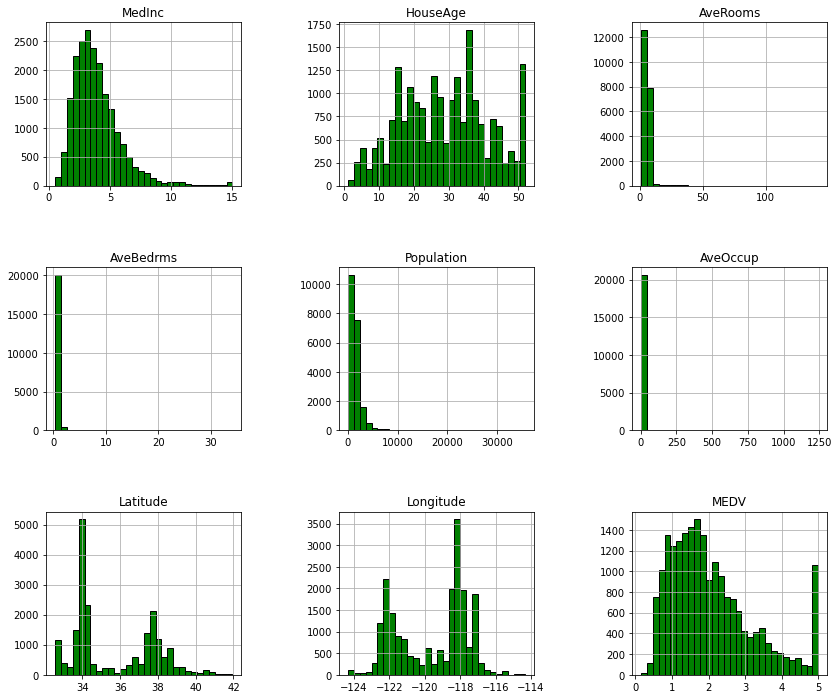

In [115]:
import matplotlib.pyplot as plt

california.hist(figsize=(14, 12), bins=30, edgecolor="black",color='green')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

## construct a correlation matrix to determine which variable/s is/are highly correlated to the target MEDV

In [8]:
california.corr().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
MEDV,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


## creating a scatterplot to visualize relationship between MedInc and MEDV

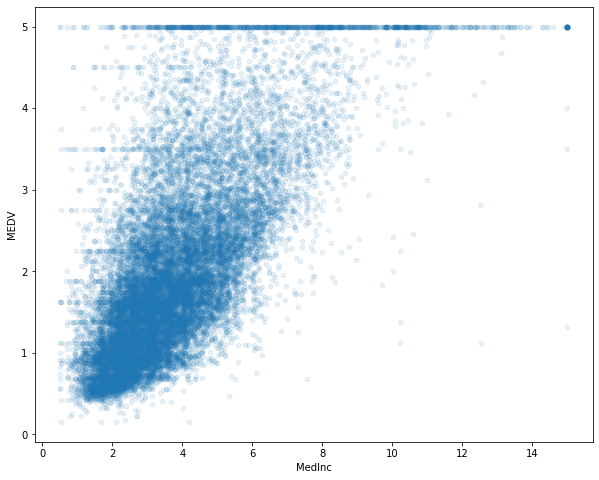

In [9]:
california.plot(kind='scatter', x='MedInc', y='MEDV', figsize=(10,8), alpha=0.1)
plt.show()

## MedInc with 0.69 corr coeficient is good candidate for predicting MEDV, starting with a univariate linear regression: MEDV = (MedInc * m) + b

In [10]:
X = california[['MedInc']] # feature matrix as column MedInc, NOTE: sklearn require 2D feature matrix
X.shape

(20640, 1)

In [11]:
Y = california['MEDV'] # target array as column MEDV, NOTE: sklearn require 1D target array
Y.shape

(20640,)

## instantiate the linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(model)

LinearRegression()


## splitting data into training and testing set (70-30 split)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size = 0.3, 
random_state=1)

## checking dimensions 

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14448, 1)
(14448,)
(6192, 1)
(6192,)


## training/fitting the model to training data

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

### estimated intercept

In [16]:
model.intercept_.round(2)

0.44

### estimated slope

In [18]:
model.coef_.round(2)

array([0.42])

### fitted model: MEDV = 0.42 * MedInc + 0.44

## Prediction/testing

In [19]:
import numpy as np
new_MedInc = np.array([5.6431]).reshape(-1,1) 
print(model.predict(new_MedInc))

[2.82497298]


C:\Users\DepEd\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### a different way to do the previous step

In [20]:
model.intercept_ + model.coef_*5.6431

array([2.82497298])

## feed in the testing set to get predictions for the remaining home values

In [32]:
y_prediction = model.predict(X_test)
type(y_prediction)

numpy.ndarray

In [33]:
y_prediction.shape

(6192,)

## test set vs fitted line

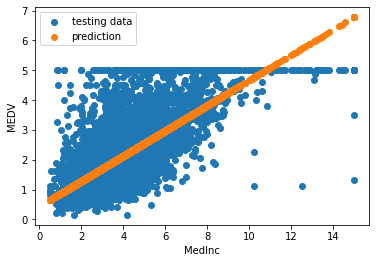

In [58]:
plt.scatter(X_test, Y_test,
label='testing data')
plt.scatter(X_test, y_prediction,
label='prediction')
plt.xlabel('MedInc')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

## evaluating the performance of the model

## calculating the residual then visualizing it 

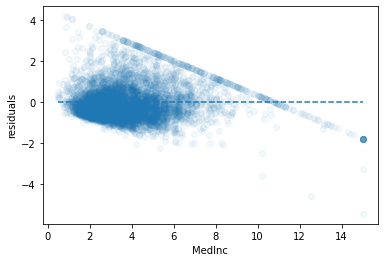

In [70]:
residuals = Y_test - y_prediction

# plotting residuals
plt.scatter(X_test, residuals, alpha=0.05)
# plotting horizontal line at y = 0
plt.hlines(y = 0, xmin = X_test.min(), xmax=X_test.max(), linestyle='--')
plt.xlabel('MedInc'); plt.ylabel('residuals')
plt.show()

### residual plot shows linear and nonlinear pattern so obviously, the model needs to be improved 

## getting the mean squared error (MSE)

In [66]:
residuals[:5]

4712     1.736482
2151    -0.569070
15927    0.157912
82       0.042336
8161    -0.375030
Name: MEDV, dtype: float64

### aggregate all residuals

In [67]:
residuals.mean()

-0.024298185780138037

### square first to avoid cancellations

In [71]:
(residuals**2).mean()

0.6999091760117266

### using MSE method in sklearn to confirm our results

In [90]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_prediction).round(2)

0.7

In [76]:
Y_test.describe()

count    6192.000000
mean        2.049954
std         1.146689
min         0.149990
25%         1.188000
50%         1.790000
75%         2.625000
max         5.000010
Name: MEDV, dtype: float64

### and indeed the MSE value is very low, very close to zero but we need to characterize it based on the dependent variable, Y_test (MEDV) has a range of 0.15 to 5.0 with variance of 1.32, comparing this variance to the MSE of 0.70, not too shaby

### getting R-squared

In [79]:
model.score(X_test, Y_test)

0.4676213698102699

### around 47% of variability in the testing data is explained by the model, perfect model explains 100% of the variability in the data so we have a lot of room for improvement 

## doing a multivariate linear regression 

### I considered the latitude and longitude as additional features because location can be very indicative of home price, even though in the correlation matrix, latitude and longitude are separately not highly correlated with MEDV. If you think about it though that would be the case because latitude alone is arbitrary in terms of pin pointing location, the same goes for longitude alone, but put them together and you havean  exact location and in real estate everything is location, location, location so there, that's why I choose these two.

### where MEDV is dependent on Latitude and Longitude in addition to MedInc, i.e., MEDV = (MedInc * b1) + (Latitude * b2) + (Longitude * b3) + b4

In [80]:
# preparation of data
X2 = california[['MedInc', 'Latitude','Longitude']]
Y = california['MEDV']
# carrying out the train-test-split, random_state is set to the same value as before to get same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, 
                                                    test_size = 0.3, 
                                                    random_state=1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression()

### making predictions

In [94]:
y_predictions2 = model2.predict(X2_test)
y_predictions2

array([2.00114072, 0.91861216, 2.54056147, ..., 1.73571783, 1.76371014,
       1.37994081])

## getting the MSE for model2 to compare with the first model

In [95]:
print(mean_squared_error(Y_test, y_predictions2).round(2))

0.56


### model2 (0.56) has a lower MSE than the first model (0.70), that's a 20% reduction in error which translates to better predictive power

## getting R-squared for model2

In [96]:
model2.score(X2_test, Y_test)

0.5770924610302457

### so around 58% of variability in the testing data is explained by model2, compare this with the first model with just 47%, therefore, model2 does a better job